In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,Conv2D,GlobalMaxPooling2D
from keras.utils import  to_categorical

from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
Ravdess = "/content/drive/MyDrive/Ravdess"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess +"/" + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess +"/"+ dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concat both dataframes
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace= True)
Ravdess_df.head()

Emotions                                               Path
0     calm  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...
1  neutral  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...
2  neutral  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...
3     calm  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...
4  neutral  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...

In [ ]:
Crema = "/content/drive/MyDrive/Crema/AudioWAV"

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema +"/"+ file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concat both dataframes
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/Crema/AudioWAV/1052_ITS...
1    happy  /content/drive/MyDrive/Crema/AudioWAV/1052_IWW...
2     fear  /content/drive/MyDrive/Crema/AudioWAV/1052_IWW...
3      sad  /content/drive/MyDrive/Crema/AudioWAV/1052_IWL...
4  disgust  /content/drive/MyDrive/Crema/AudioWAV/1052_IWW...

In [ ]:
Tess = "/content/drive/MyDrive/TESS Toronto emotional speech set data"

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess+"/" + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess +"/"+ dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concat both dataframes
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0     fear  /content/drive/MyDrive/TESS Toronto emotional ...
1     fear  /content/drive/MyDrive/TESS Toronto emotional ...
2     fear  /content/drive/MyDrive/TESS Toronto emotional ...
3     fear  /content/drive/MyDrive/TESS Toronto emotional ...
4     fear  /content/drive/MyDrive/TESS Toronto emotional ...

In [ ]:
Savee = "/content/drive/MyDrive/Savee/ALL"

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + "/" + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
      file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concat both dataframes
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                         Path
0    angry  /content/drive/MyDrive/Savee/ALL/DC_a12.wav
1    angry  /content/drive/MyDrive/Savee/ALL/DC_a01.wav
2    angry  /content/drive/MyDrive/Savee/ALL/DC_a13.wav
3    angry  /content/drive/MyDrive/Savee/ALL/DC_a07.wav
4    angry  /content/drive/MyDrive/Savee/ALL/DC_a10.wav

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0     calm  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...
1  neutral  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...
2  neutral  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...
3     calm  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...
4  neutral  /content/drive/MyDrive/Ravdess/Actor_23/03-01-...

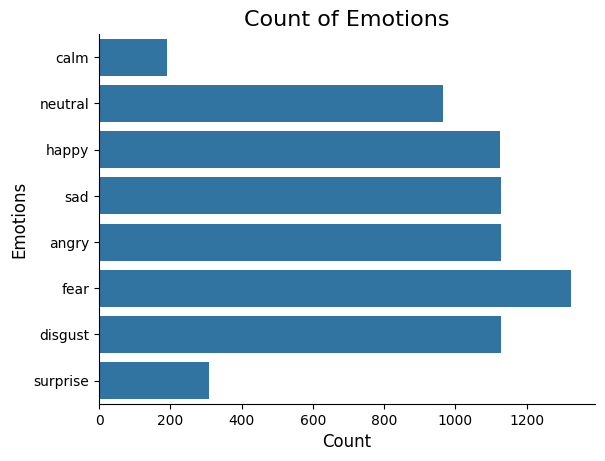

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.xlabel('Count', size=12)
plt.ylabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(data = Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

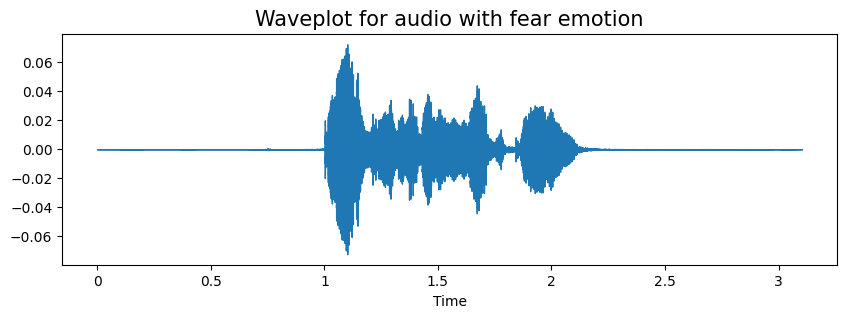

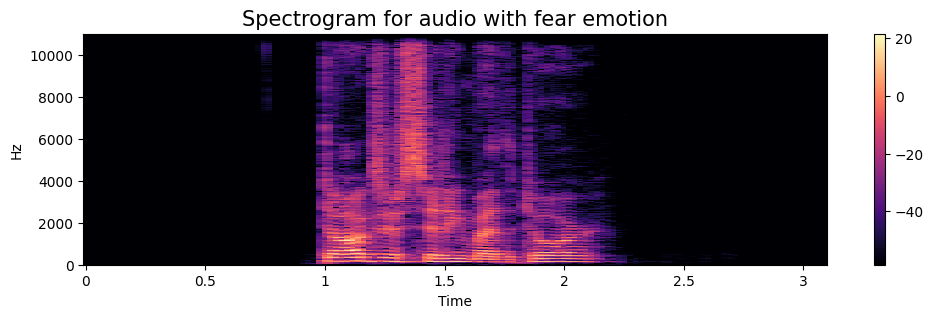

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

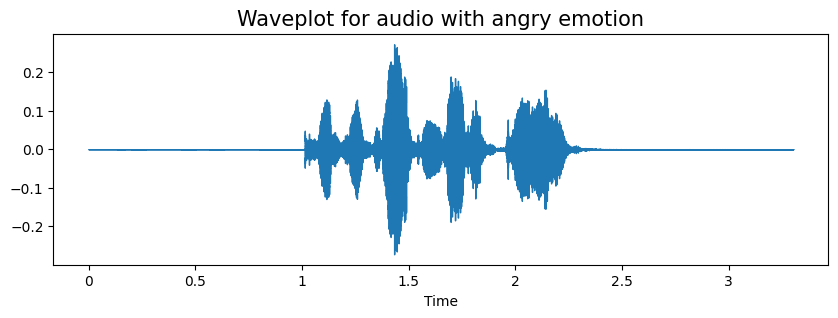

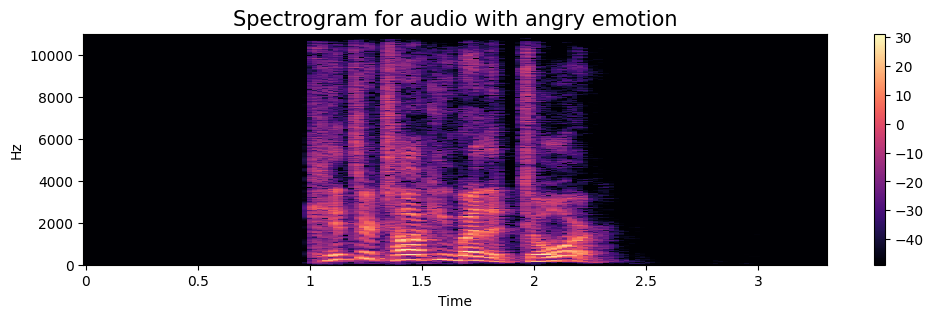

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

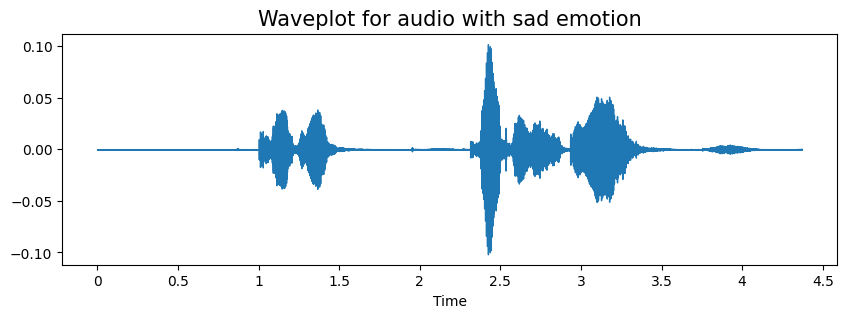

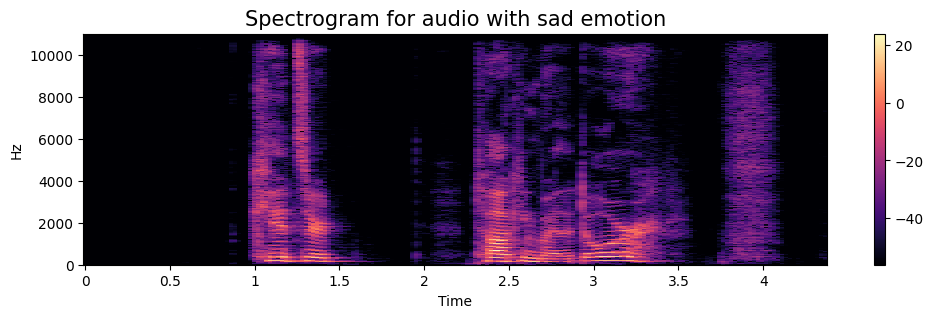

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

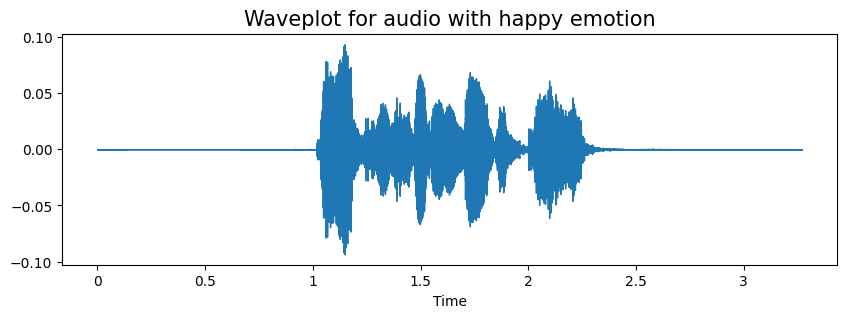

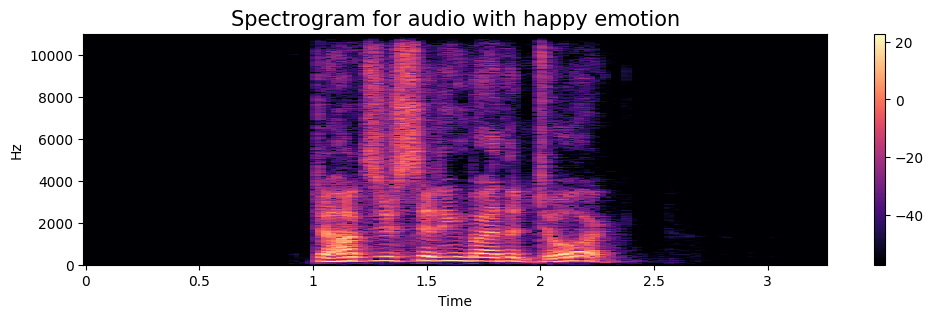

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data,rate = rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

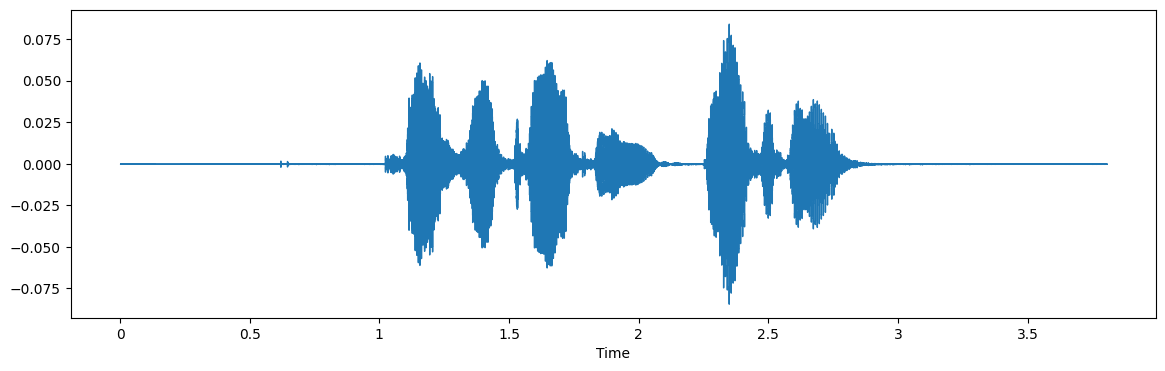

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

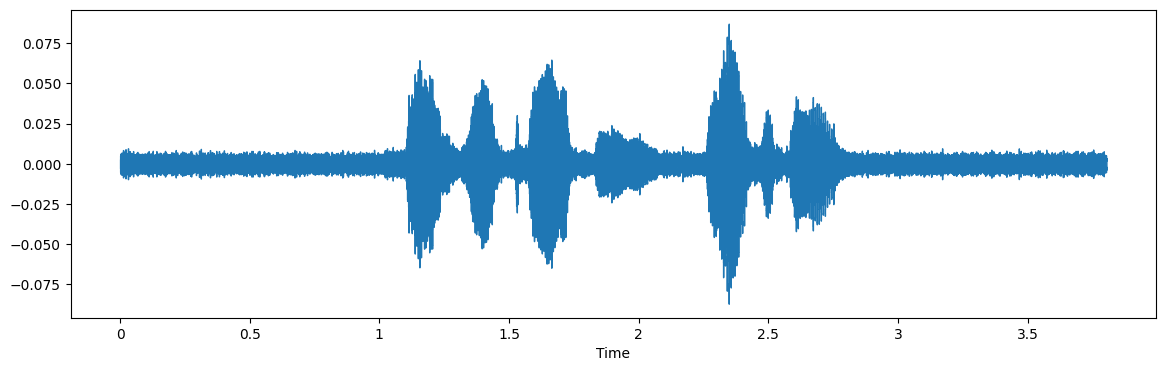

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

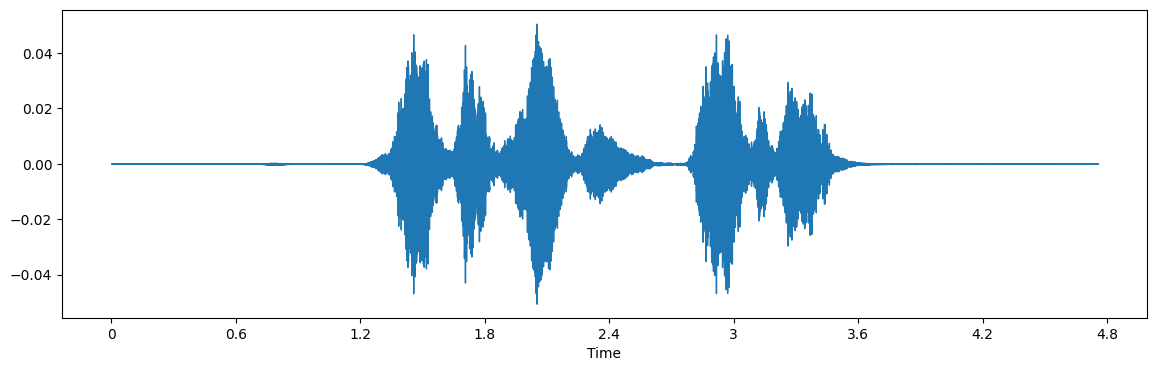

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

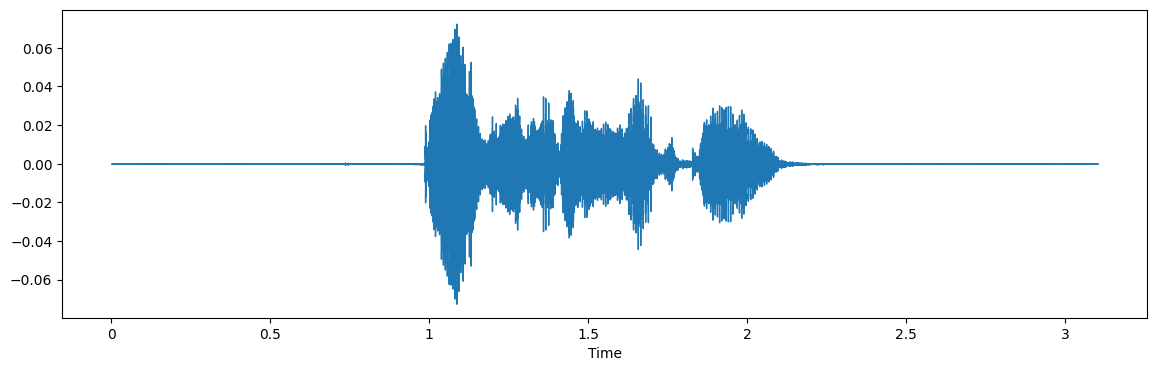

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

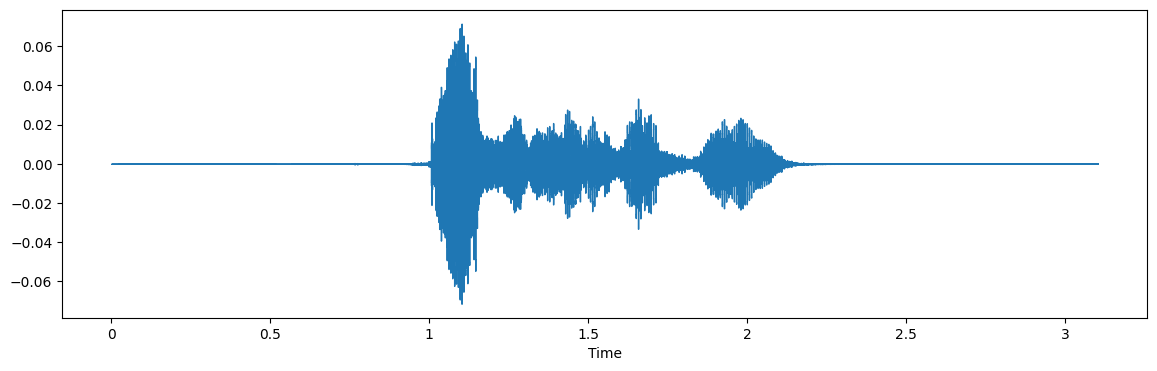

In [ ]:
x = pitch(data,sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def extract_features(data):
    # ZCR (Compute the zero-crossing rate of an audio time series)
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft (Computes chromagram from a waveform or power spectrogram)
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Mel-frequency cepstral coefficients (MFCCs)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram (Compute mel-scaled spectrogram)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result



In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with shift
    shifted_data = shift(data)
    res4 = extract_features(shifted_data)
    result = np.vstack((result,res4))

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 4 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.Path.shape

(26444, 26444, (7305,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('/content/drive/MyDrive/features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.214830  0.701068  0.658663  0.650596  0.700747  0.683654  0.699625   
1  0.268288  0.780233  0.768449  0.766210  0.817473  0.804185  0.771187   
2  0.127966  0.659643  0.677175  0.630708  0.651749  0.648680  0.616886   
3  0.216024  0.679648  0.693540  0.631950  0.683787  0.682653  0.696581   
4  0.208989  0.703067  0.722071  0.645243  0.583377  0.610369  0.577258   

          7         8         9  ...       153       154       155       156  \
0  0.647537  0.644692  0.665607  ...  0.000030  0.000043  0.000032  0.000037   
1  0.713001  0.677911  0.692284  ...  0.000076  0.000087  0.000073  0.000082   
2  0.650074  0.599988  0.610897  ...  0.000007  0.000008  0.000007  0.000008   
3  0.678932  0.629051  0.658786  ...  0.000030  0.000043  0.000032  0.000037   
4  0.553561  0.582181  0.611153  ...  0.000030  0.000033  0.000039  0.000039   

        157       158       159       160           161   labels  
0  0.000055  0.000047  0.000039  0.000019  1.835029e-06     calm  
1  0.000103  0.000095  0.000085  0.000062  4.792455e-05     calm  
2  0.000006  0.000010  0.000012  0.000006  5.143717e-07     calm  
3  0.000055  0.000047  0.000039  0.000019  1.838325e-06     calm  
4  0.000040  0.000043  0.000049  0.000033  2.045571e-06  neutral  

[5 rows x 163 columns]

In [ ]:
Features = pd.read_csv('/content/drive/MyDrive/features.csv')
Features.head()

0         1         2         3         4         5         6  \
0  0.214830  0.701068  0.658663  0.650596  0.700747  0.683654  0.699625   
1  0.268288  0.780233  0.768449  0.766210  0.817473  0.804185  0.771187   
2  0.127966  0.659643  0.677175  0.630708  0.651749  0.648680  0.616886   
3  0.216024  0.679648  0.693540  0.631950  0.683787  0.682653  0.696581   
4  0.208989  0.703067  0.722071  0.645243  0.583377  0.610369  0.577258   

          7         8         9  ...       153       154       155       156  \
0  0.647537  0.644692  0.665607  ...  0.000030  0.000043  0.000032  0.000037   
1  0.713001  0.677911  0.692284  ...  0.000076  0.000087  0.000073  0.000082   
2  0.650074  0.599988  0.610897  ...  0.000007  0.000008  0.000007  0.000008   
3  0.678932  0.629051  0.658786  ...  0.000030  0.000043  0.000032  0.000037   
4  0.553561  0.582181  0.611153  ...  0.000030  0.000033  0.000039  0.000039   

        157       158       159       160           161   labels  
0  0.000055  0.000047  0.000039  0.000019  1.835029e-06     calm  
1  0.000103  0.000095  0.000085  0.000062  4.792455e-05     calm  
2  0.000006  0.000010  0.000012  0.000006  5.143717e-07     calm  
3  0.000055  0.000047  0.000039  0.000019  1.838325e-06     calm  
4  0.000040  0.000043  0.000049  0.000033  2.045571e-06  neutral  

[5 rows x 163 columns]

In [ ]:
Features.shape

(26444, 163)

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19833, 162), (19833, 8), (6611, 162), (6611, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19833, 162), (19833, 8), (6611, 162), (6611, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19833, 162, 1), (19833, 8), (6611, 162, 1), (6611, 8))

In [ ]:
model=Sequential()
model.add(Conv1D(filters=256, kernel_size=4, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

model.add(Conv1D(filters=128, kernel_size=4, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

model.add(Conv1D(filters=128, kernel_size=4, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=4, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))


model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 162, 256)          1280      
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 81, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_23 (Conv1D)          (None, 81, 128)           131200    
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 41, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_24 (Conv1D)          (None, 41, 128)           65664     
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 21, 128)         

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=75, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
310/310 [==============================] - 9s 17ms/step - loss: 1.6599 - accuracy: 0.3227 - val_loss: 1.5505 - val_accuracy: 0.3704 - lr: 0.0010
Epoch 2/75
310/310 [==============================] - 3s 10ms/step - loss: 1.5165 - accuracy: 0.3876 - val_loss: 1.4723 - val_accuracy: 0.4204 - lr: 0.0010
Epoch 3/75
310/310 [==============================] - 3s 10ms/step - loss: 1.4492 - accuracy: 0.4191 - val_loss: 1.4059 - val_accuracy: 0.4446 - lr: 0.0010
Epoch 4/75
310/310 [==============================] - 3s 9ms/step - loss: 1.3869 - accuracy: 0.4430 - val_loss: 1.3652 - val_accuracy: 0.4564 - lr: 0.0010
Epoch 5/75
310/310 [==============================] - 4s 11ms/step - loss: 1.3428 - accuracy: 0.4644 - val_loss: 1.3306 - val_accuracy: 0.4694 - lr: 0.0010
Epoch 6/75
310/310 [==============================] - 3s 11ms/step - loss: 1.3010 - accuracy: 0.4852 - val_loss: 1.3323 - val_accuracy: 0.4654 - lr: 0.0010
Epoch 7/75
310/310 [==============================] - 3s 9ms/step

207/207 [==============================] - 1s 3ms/step - loss: 1.2818 - accuracy: 0.7211
Accuracy of our model on test data :  72.1070945262909 %


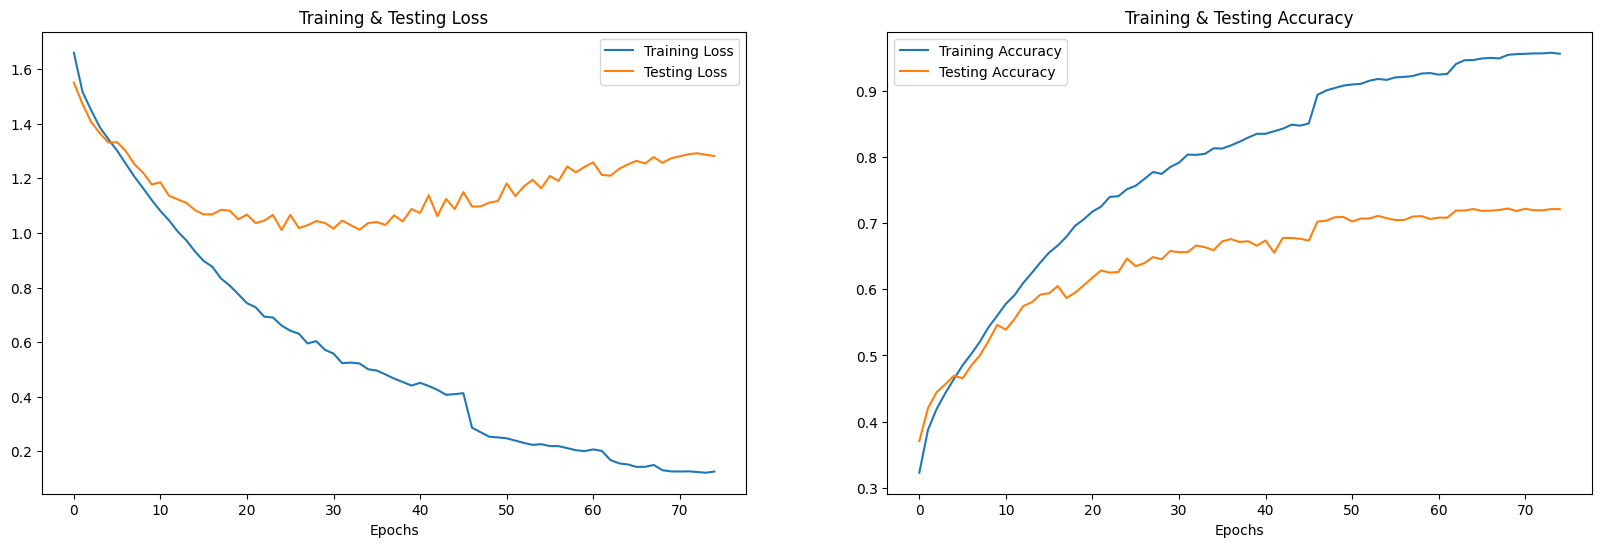

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(75)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

207/207 [==============================] - 1s 2ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0          disgust       disgust
1             fear          fear
2            angry         angry
3              sad           sad
4            angry         angry
5            angry         angry
6         surprise         angry
7             fear          fear
8             fear          fear
9              sad           sad

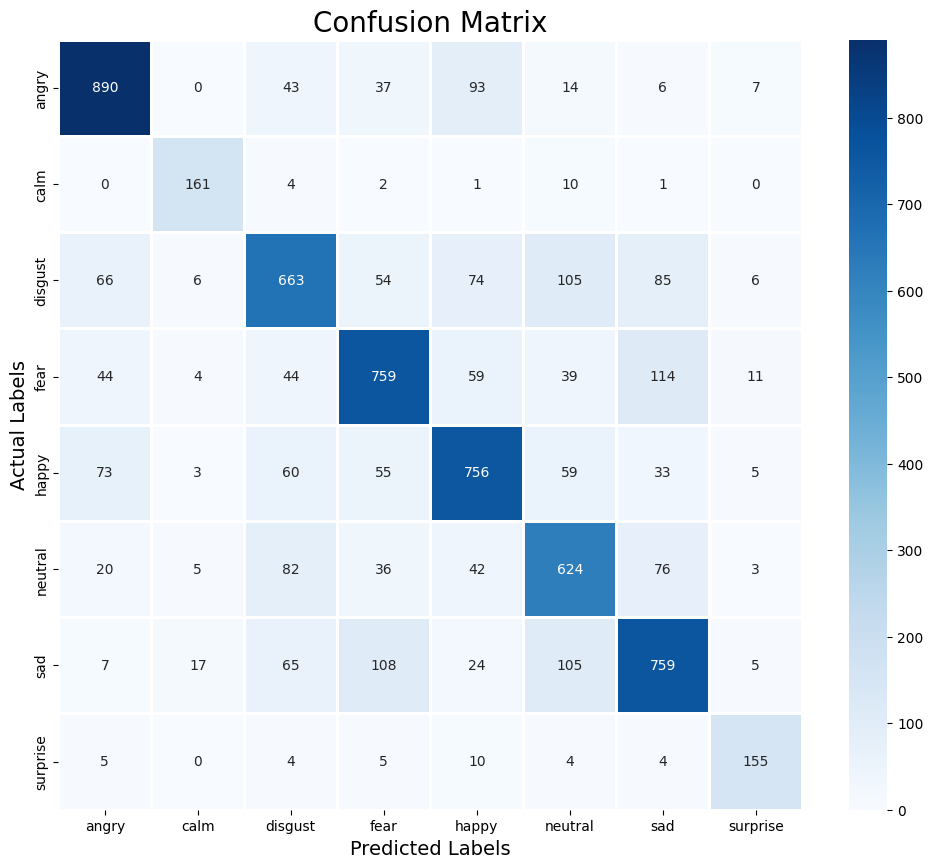

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.81      0.82      0.81      1090
        calm       0.82      0.90      0.86       179
     disgust       0.69      0.63      0.66      1059
        fear       0.72      0.71      0.71      1074
       happy       0.71      0.72      0.72      1044
     neutral       0.65      0.70      0.68       888
         sad       0.70      0.70      0.70      1090
    surprise       0.81      0.83      0.82       187

    accuracy                           0.72      6611
   macro avg       0.74      0.75      0.74      6611
weighted avg       0.72      0.72      0.72      6611



In [ ]:
model.save('speech_emotion.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = keras.models.load_model('speech_emotion.h5')
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 162, 256)          1280      
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 81, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_23 (Conv1D)          (None, 81, 128)           131200    
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 41, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_24 (Conv1D)          (None, 41, 128)           65664     
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 21, 128)         